# 1. Bestimmung der Wellenlänge


Wir bestimmen zuerst die Wellenlänge eines grünen Lasers mithilfe eines Michelson Interferrometer. Dazu verwenden wir Formel (35) in der Form
\begin{equation}\lambda= 2 \frac{s_e - s_a}{m} \tag{39} \end{equation}

<center>Tabelle 1: </center>

| $s_a$ [mm] | $s_e$ [mm] | $m$ [A.U.] |
|------|------|-----|
|0.0000|2.9645|11089|
|3.2000|0.2400|9538 |
|0.5000|3.4590|10452|
|3.2000|0.2350|11158|
|0.1000|3.0645|11131|

Dabei verwenden wir die Werte aus Tabelle 1 und berechnen die Wellenlängen nach Formel (39).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from IPython.display import display, Math, Latex
# Auslesen von Daten aus einer CSV die auf Github gespeichert wurde
data_1 = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/Aufgabe1.csv',
                       delimiter =";")
s_e = data_1[:,1]
s_a = data_1[:,0]
dm = data_1[:,2]
wavelength = 2*np.absolute(s_e - s_a)/dm 
print(wavelength)

[0.00053467 0.00062068 0.00056621 0.00053146 0.00053266]


Aus diesen Werten für die Wellenlängen können wir nun den Mittelwert bestimmen und dazu die Standardabweichung des Mittelwertes.

In [3]:
from IPython.display import display, Math
std_wave = sp.stats.sem(wavelength, ddof = 1)
wavelength_m = np.mean(wavelength)
display(Math('\lambda ='  + str(wavelength_m)+'mm'))
display(Math('s_{\lambda} = '+ str(std_wave)+'mm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

So berechnen wir die Wellenlänge des Lasers zu $\lambda = 557.1 nm $ <br>
Dabei erhalten wir die Standardabweichung gegeben durch $s_\lambda = 1.7 \cdot 10^{-5} mm = 17 nm$

Nun müssen wir noch den Fehler der Berechnung abschätzen. Diesen schätzen wir aus dem Linearitätsfehler $\Delta L = 9 \mu m$  und dem Ablesefehler der bei $\Delta s = 0.5 \mu m$ Für $\Delta m$ schätzen wir $\Delta m = 100$
\begin{equation}
\Delta \lambda = \sqrt{\left(\frac{\Delta s_a}{m}\right)^2+\left( \frac{\Delta s_e}{m}\right)^2+\left(\frac{s_e - s_a}{m^2}\Delta m\right)^2} \tag{40}
\end{equation}

Wobei $\Delta s_a = \sqrt{{\Delta s}^2 + {\Delta L}^2}$ ebenso für $s_e$

In [4]:
del_s = 0.5*10**-3
del_L = 9*10**-3
del_m = 100
del_sa = np.sqrt(del_L**2 + del_s**2)
m = np.mean(dm)
sea = np.mean(np.abs(s_e-s_a))
del_lambda = 10**-3*np.sqrt(2*(del_sa/m)**2+(sea/(m**2) *del_m)**2)
display(Math('\Delta \lambda = '+ str(del_lambda)+ 'm'))

<IPython.core.display.Math object>

Dabei erhalten wir einen systematischen Fehler von $\Delta\lambda = 2.9 nm$<br>
Es ergibt sich also: <br>
>$\lambda \pm \Delta \lambda_{stat} \pm \Delta\lambda_{sys} = \left( 557.1 \pm 17 \pm 2.9 \right) nm$

Vom Hersteller wird eine Wellenlänge von $\lambda_{lit} =( 532 \pm 1)nm$ angegeben. Dies stimmt nach:
\begin{equation}
\frac{\lvert\lambda -\lambda_{lit} \rvert}{\sqrt{\Delta \lambda^2 + \Delta \lambda_{lit}^2}}
\end{equation}
Innerhalb von 1.5 $\sigma$ miteinander überein.

# 2. Bestimmung des Brechungsindex von Luft

Wir bestimmen nun den Brechungsindex von Luft mithilfe der gezälhten Interferenzordnungen und der dazugehörigen Drücke. Wir verwenden dazu den Interferometer und die lineare Abhängigkeit des Gangunterschiedes vom  Brechungsindexunterschied wie in Gleichung (37) beschrieben.  Wir rechnen diese auf Normalbedingungen um.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data_2 = np.genfromtxt ('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/Tabelle%202%20(Torr).csv',
                        delimiter=',')

p0 = data_2[:3,0:1]
p5 = data_2[:3,1:2]
p10 = data_2[:3,2:3]
p15 = data_2[:3,3:4]
p20 = data_2[:3,4:5]
p25 = data_2[:3,5:6]
p30 = data_2[:3,6:7]
p35 = data_2[:3,7:8]
p40 = data_2[:3,8:9]
p45 = data_2[:3,9:10]
p49 = data_2[:3,10:11]
m = 5
m_mean = np.mean(data_2[3:,:])

means_5 = np.array([np.mean(p0),np.mean(p5),np.mean(p10),np.mean(p15),
                    np.mean(p20),np.mean(p25),np.mean(p30),np.mean(p35),np.mean(p40),np.mean(p45)])
means_4 = np.array([np.mean(p0),np.mean(p5),np.mean(p10),np.mean(p15),
                    np.mean(p20),np.mean(p25),np.mean(p30),np.mean(p35),np.mean(p40),np.mean(p45),np.mean(p49)])

print(means_4)

[3708.33333333 3350.         2966.66666667 2600.         2216.66666667
 1833.33333333 1450.         1083.33333333  700.          325.
    0.        ]


<center>Tabelle 2: Gemessene Druck und Mittelwerte</center>

|  $p_0$ [Torr] |  $p_5$ [Torr] |  $p_{10}$ [Torr] |  $p_{15}$ [Torr] |  $p_{20}$ [Torr] |  $p_{25}$ [Torr] |  $p_{30}$ [Torr] |  $p_{35}$ [Torr] |  $p_{40}$ [Torr] |  $p_{45}$ [Torr] |  $p_{49}$ [Torr] |
|----|----|----|----|----|----|----|----|---|---|---|
|3700|3350|2975|2600|2225|1825|1450|1100|700|325|0  |
|3700|3350|2950|2600|2225|1850|1450|1075|700|325|0  |
|3725|3350|2975|2600|2200|1825|1450|1075|700|325|0  |

|  $\bar{p}_0$ [Torr] |  $\bar{p}_5$ [Torr] |  $\bar{p}_{10}$ [Torr] |  $\bar{p}_{15}$ [Torr] |  $\bar{p}_{20}$ [Torr] |  $\bar{p}_{25}$ [Torr] |  $\bar{p}_{30}$ [Torr] |  $\bar{p}_{35}$ [Torr] |  $\bar{p}_{40}$ [Torr] |  $\bar{p}_{45}$ [Torr] |  $\bar{p}_{49}$ [Torr] |
|----|----|----|----|----|----|----|----|---|---|---|
|3708.33|3350.00|2966.67|2600.00|2216.67|1833.33|1450.00|1083.33|700.00|325.00|0  |

In [6]:
#Statistische Fehlern
pressures = np.delete(data_2,3,0)
std_p = sp.stats.sem(pressures,ddof = 1)
with np.printoptions(precision = 3):
    print(std_p)

[8.333 0.    8.333 0.    8.333 8.333 0.    8.333 0.    0.    0.   ]


In [7]:
#Systematische Fehlern
sys_p = 5 + means_4*0.0006
print(sys_p)

[7.225 7.01  6.78  6.56  6.33  6.1   5.87  5.65  5.42  5.195 5.   ]


<center>Tabelle 3: Statistische und systematische Fehlern von Druck in Torr</center>

|  ${(\Delta \bar{p}_0)_{stat}}$ |  ${(\Delta \bar{p}_5)_{stat}}$ |  ${(\Delta \bar{p}_{10})_{stat}}$ |  ${(\Delta \bar{p}_{15})_{stat}}$ |  ${(\Delta \bar{p}_{20})_{stat}}$ |  ${(\Delta \bar{p}_{25})_{stat}}$ |  ${(\Delta \bar{p}_{30})_{stat}}$ |  ${(\Delta \bar{p}_{35})_{stat}}$ |  ${(\Delta \bar{p}_{40})_{stat}}$ |  ${(\Delta \bar{p}_{45})_{stat}}$ |  ${(\Delta \bar{p}_{49})_{stat}}$ |
|----|----|----|----|----|----|----|----|---|---|---|
|8.33|0|8.33|0|8.33|8.33|0|8.33|0|0|0  |

|  ${(\Delta \bar{p}_0)_{sys}}$ |  ${(\Delta \bar{p}_5)_{sys}}$ |  ${(\Delta \bar{p}_{10})_{sys}}$ |  ${(\Delta \bar{p}_{15})_{sys}}$ |  ${(\Delta \bar{p}_{20})_{sys}}$ |  ${(\Delta \bar{p}_{25})_{sys}}$ |  ${(\Delta \bar{p}_{30})_{sys}}$ |  ${(\Delta \bar{p}_{35})_{sys}}$ |  ${(\Delta \bar{p}_{40})_{sys}}$ |  ${(\Delta \bar{p}_{45})_{sys}}$ |  ${(\Delta \bar{p}_{49})_{sys}}$ |
|------|------|------|------|------|------|------|------|------|------|------|
|7.23|7.01|6.78|6.56|6.33|6.10|5.87|5.65|5.42|5.20|5.00  |

Die Gesamtfehlern des Drucks ergeben sich durch ${\Delta p}=\sqrt{{(\Delta \bar{p})_{stat}}^2+{(\Delta \bar{p})_{sys}}^2}$ und sind in der folgende Tabelle dargestellt.

In [8]:
#Gesamtfehlern
ges_p = (std_p**2+sys_p**2)**0.5
print(ges_p)

[11.02928236  7.01       10.74303702  6.56       10.46486237 10.32736387
  5.87       10.06811524  5.42        5.195       5.        ]


<center>Tabelle 4: Gesamtfehlern von Druck in Torr</center>

|  ${\Delta \bar{p}_0}$ |  ${\Delta \bar{p}_5}$ |  ${\Delta \bar{p}_{10}}$ |  ${\Delta \bar{p}_{15}}$ |  ${\Delta \bar{p}_{20}}$ |  ${\Delta \bar{p}_{25}}$ |  ${\Delta \bar{p}_{30}}$ |  ${\Delta \bar{p}_{35}}$ |  ${\Delta \bar{p}_{40}}$ |  ${\Delta \bar{p}_{45}}$ |  ${\Delta \bar{p}_{49}}$ |
|------|------|------|------|------|------|------|------|------|------|------|
|11.03|7.01|10.74|6.56|10.46|10.33|5.87|10.07|5.42|5.20|5.00  |

Es gilt:
\begin{equation} \frac{n_0-1}{n(p)-1}=\frac{p_0T}{pT_0} \tag{40} \end{equation}
wobei ${n_0}$ der Brechngsindex von Luft auf Normalbedingungen ist.<br>

Mit Hilfe von Gleichung (38) folgt:
\begin{equation} (n_0-1)=(n-1)\frac{p_0}{p}\frac{T}{T_0}=\frac{\lambda}{2a}\frac{\Delta m}{p}\frac{p_0T}{T_0} \tag{41} \end{equation}

Somit ergibt sich für den Brechngsindex von Luft auf Normalbedingungen:
\begin{equation} n_0=\frac{\lambda}{2a}\frac{\Delta m}{p}\frac{p_0T}{T_0}+1 \tag{42} \end{equation}
wobei T die Temperatur während der Messung, ${T_0}$ die Temperatur auf Normalbedingungen, ${p_0}$ der Druck auf Normalbedingungen, ${\lambda}$ die Wellenlänge des Lasers und a das Innenmaß der Küvette darstellen. Die gennante Werte betragen:<br>
>${T_0}=273.15 K$<br>
>${p_0}=101325 Pa = 760 Torr$<br>
>${\lambda}=(532\pm1) nm =(532\pm1)\cdot10^{-9} m$<br>
>${a}=(50\pm0.05) mm = (50\pm0.05)\cdot10^{-3} m$<br>
(Quelle: Praktikumsanleitung Versuch 232)

Um die Steigung $\left(\frac{\Delta m}{p}\right)$ zu berechnen werden die Werte von ${\Delta m}$ über den Druck $p$ in einem Diagramm eingetragen. Da der Druck hierbei natürlich ein Unterdruck ist werden die Drücke negativ aufgetragen. Die Werte befinden sich in der Tabelle 3 der Auswertung und sind in der folgender Diagramm dargestellt:

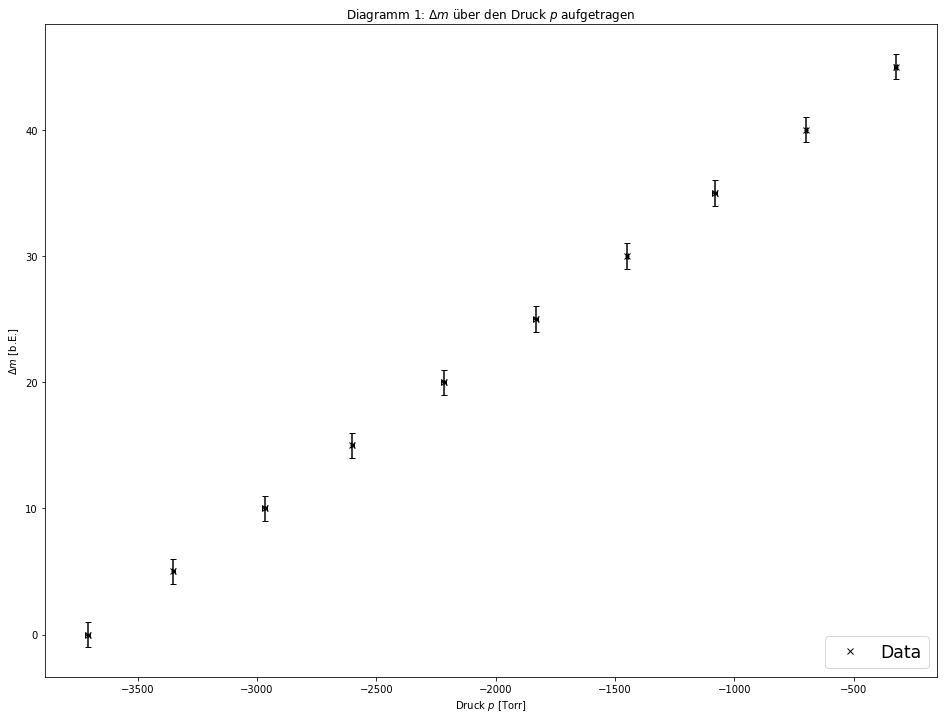

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(16,12))
x = -means_5
y = [0,5,10,15,20,25,30,35,40,45]
xe = np.delete(ges_p,10)
plt.plot(x,y, 'xk', label='Data')
plt.errorbar(x, y, xerr = xe, yerr = 1, capsize=3, fmt='.k')
plt.title('Diagramm 1: $\Delta m$ über den Druck $p$ aufgetragen')
plt.xlabel('Druck $p$ [Torr]')
plt.ylabel('${\Delta m}$ [b.E.]')
plt.legend(loc = "lower right",fontsize ="xx-large")

Diese Werte werden nun mit einem Linearen Modell $ y = m*x+c$ gefittet. Dabei wird die ODR, Orthogonal Distance Regression, Library von SciPy verwendet da die Curve_Fit Library nicht mit Fehlern auf der X Achse umgehen kann. Wir Fitten diese Kurve in einem Plot an die Daten.

In [10]:
from scipy import odr
def fit1(p,x):
    m,c = p
    return m*x+c
linear = odr.Model(fit1)
fit1Data = odr.RealData(x,y,sx = xe,sy=1)
odr1 = odr.ODR(fit1Data,linear,beta0 =[-0.,49.])
fit1out = odr1.run()
fit1out.pprint()


Beta: [1.32521923e-02 4.93137025e+01]
Beta Std Error: [2.77970774e-05 6.37229990e-02]
Beta Covariance: [[8.61511468e-08 1.74006627e-04]
 [1.74006627e-04 4.52746607e-01]]
Residual Variance: 0.008968859280538146
Inverse Condition #: 0.0020596083231244973
Reason(s) for Halting:
  Sum of squares convergence


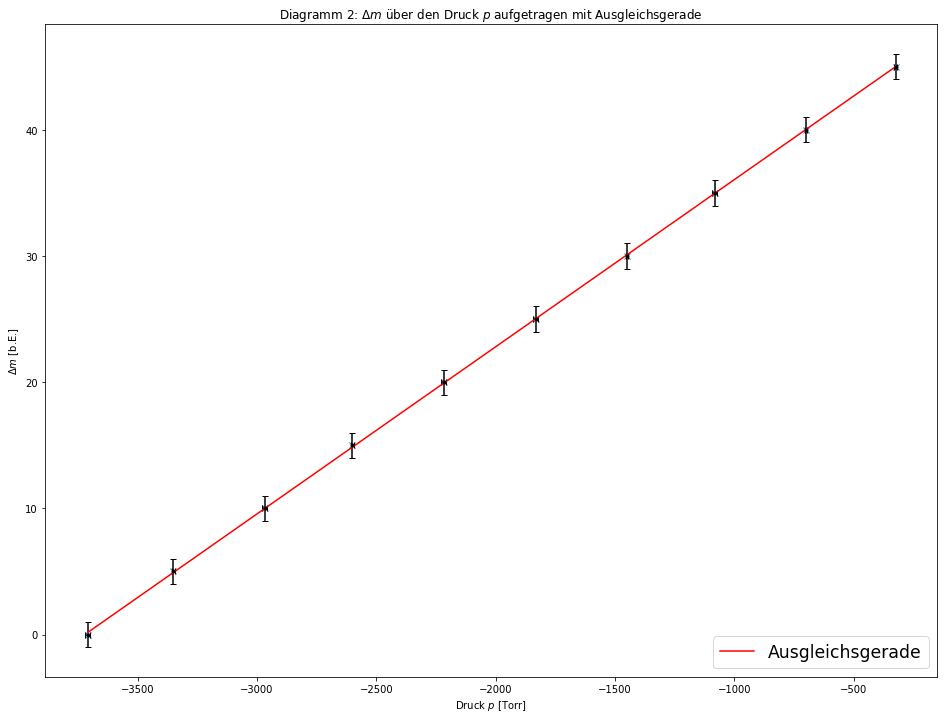

In [11]:
plt.figure(figsize=(16,12))
x = -means_5
y = [0,5,10,15,20,25,30,35,40,45]
xe = np.delete(ges_p,10)
plt.plot(x,y, 'x')
plt.errorbar(x, y, xerr = xe, yerr = 1, capsize=3, fmt='.k')
fit = fit1out.beta
fit_y = fit1(fit,x)
plt.plot(x,fit_y,'-r',label="Ausgleichsgerade")
plt.title('Diagramm 2: $\Delta m$ über den Druck $p$ aufgetragen mit Ausgleichsgerade')
plt.xlabel('Druck $p$ [Torr]')
plt.ylabel('${\Delta m}$ [b.E.]')
plt.legend(loc = "lower right",fontsize ="xx-large")

Aus der Diagramm 1 ergibt sich somit für die Steigungen $\left(\frac{\Delta m}{p}\right)$ der Ausgleich- und Fehlergeraden:<br>
>$\left(\frac{\Delta m}{p}\right)=1.32521923\cdot10^{-2} \frac{1}{Torr}$<br><br>
>${\Delta \left(\frac{\Delta m}{p}\right)}=2.77970774\cdot10^{-5} \frac{1}{Torr}$

Nach dem Gaußschen Fehlerfortpflanzung ist der Fehler des Brechungsindex von Luft auf Normalbedingungen:

\begin{equation} {\Delta n_0}=\sqrt{{\left(\frac{\Delta \lambda}{2a}\frac{\Delta m}{p}\frac{p_0T}{T_0}\right)}^2+{\left(\frac{\lambda}{2a}{\Delta \left(\frac{\Delta m}{p}\right)}\frac{p_0T}{T_0}\right)}^2+{\left(\frac{\lambda}{2a}\frac{\Delta m}{p}\frac{p_0\Delta T}{T_0}\right)}^2+{\left(\frac{\lambda\Delta a}{2a^2}\frac{\Delta m}{p}\frac{p_0T}{T_0}\right)}^2} \tag{43} \end{equation}

In [12]:
from IPython.display import display, Math
t_0 = 273.15
p_0 = 760
n_l = 532*10**-9
del_n_l = 1*10**-9
n_a = 50*10**-3
del_n_a = 0.05*10**-3
t = 23.8+273.15
del_t = 0.1

dmp = fit1out.beta[0]
del_dmp = 2.77970774e-05

n_0 = n_l/(2*n_a)*dmp*p_0*t/t_0 + 1
display(Math('n_0 =' + str(n_0)))

del_n_0 = ((del_n_l*dmp*p_0*t/(2*n_a*t_0))**2+(n_l*del_dmp*p_0*t/(2*n_a*t_0))**2+
           (n_l*dmp*p_0*del_t/(2*n_a*t_0))**2+(n_l*del_n_a*dmp*p_0*t/(2*(n_a)**2*t_0)**2)**0.5)
display(Math('\Delta n_0 =' + str(del_n_0)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Damit ergibt sich für der gemessene Brechungsindex von Luft auf Normalbedingungen und ihre Fehler: <br>
>$n_0 = 1.00006 \pm 0.00021$

Dies stimmt nach:
\begin{equation}
\frac{\lvert n_0 -n_{0lit} \rvert}{\sqrt{\Delta n_0^2 + \Delta n_{0lit}^2}}
\end{equation}
Innerhalb von 1.05 $\sigma$ miteinander überein, wobei der Literaturwert $n_{0lit}$ gegeben ist durch
$n_{0lit}=1.00028$ (Quelle: Praktikumsanleitung Versuch 232)

# 3. Bestimmung der Kohärenzlänge einer Leuchtdiode

Nun berechnen wir die Kohärenzlänge einer Leuchtdiode aus der Aufnahme ihres zeitlichen Verlaufs vor einem Intensitätsmessgerät (Oszilloskop). Wir verwenden die vom Oszilloskop gemessenen Daten und fitten eine Gaußkurve an diese an. Mithilfe der Fit-Parameter können wir danach die Kohärenzlänge ermitteln.

[-0.028, 0.07, -0.077, 0.077]

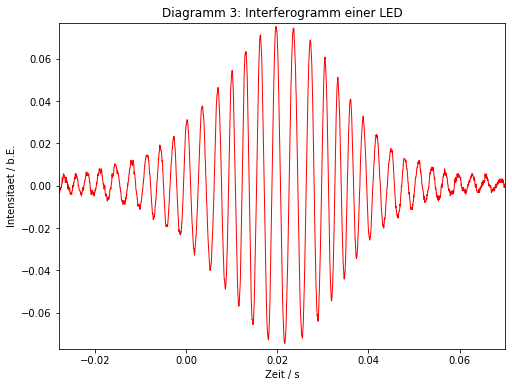

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data_3 = np.genfromtxt ('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/F0013CH1.CSV',
                        delimiter=",", skip_header=18)
t = data_3[:,3:4]
t = t[:, 0]
U = data_3[:,4:5]
U = U[:, 0]

plt.figure(figsize=(8,6))
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Diagramm 3: Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

[  51  116  181  249  331  429  510  578  657  726  809  896  975 1048
 1128 1214 1311 1407 1482 1553 1624 1693 1767 1850 1917 2003 2074 2141
 2220 2293 2369 2448]


[-0.028, 0.07, -0.077, 0.077]

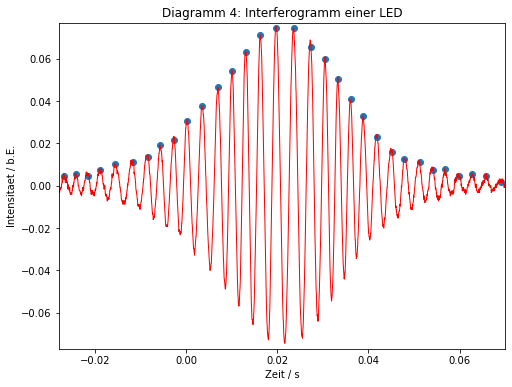

In [14]:
from scipy import signal
peakind = signal.find_peaks_cwt(U, np.arange(1,40), noise_perc=20)
print(peakind)

plt.figure(figsize=(8,6))
plt.plot(t[peakind], U[peakind], marker = 'o', linewidth = 0)
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Diagramm 4: Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

-0.002768041822655478 0.02028966403454033 -0.015280269951581443


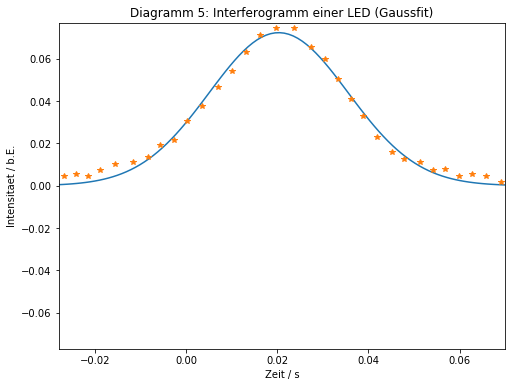

In [15]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
  return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitFunc, t[peakind], U[peakind], maxfev = 880)

x = np.linspace(-0.028,0.07,100)
plt.figure(figsize=(8,6))
plt.plot(x, fitFunc(x, *popt))
plt.plot(t[peakind], U[peakind], marker = '*', linewidth = 0)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Diagramm 5: Interferogramm einer LED (Gaussfit)')
plt.axis([-0.028, 0.07, -0.077, 0.077])
print(*popt)

Aus dem Fit erhalten wir den Wert für $\sigma = 0.0153$ . Somit ergibt sich für die Kohärenzzeit:<br>
>$\tau = 2 \cdot \sigma = 0.0306 s$ <br>

Nach Gleichung:
\begin{equation} L = v\tau \tag{44} \end{equation}
mit $v = 0.1 mm/s = 10^{-4} m/s$ (Quelle: Praktikumsanleitung Versuch 232) ergibt sich für die Kohärenzlänge:
>$L = 3.06 \cdot 10^{-6}m$